## Dataset from Kaggle
**Author Say Kin Lee**

In [1]:
# Libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm, preprocessing
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


In [2]:
file_dir = 'Data/dataset/'
file_csv = 'restaurant_customer_satisfaction_workcopy.csv'

#importing dataset of restaurant satisfaction
df = pd.read_csv(file_dir + file_csv)
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [4]:
# Check data summary with some basic statistic
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,1500.0,NaN,NaN,NaN,1403.5,433.157015,654.0,1028.75,1403.5,1778.25,2153.0
Age,1500.0,NaN,NaN,NaN,43.832,14.967157,18.0,31.75,44.0,57.0,69.0
Gender,1500,2,Female,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,1500.0,NaN,NaN,NaN,85921.89,38183.051749,20012.0,52444.0,85811.0,119159.25,149875.0
VisitFrequency,1500,4,Weekly,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageSpend,1500.0,NaN,NaN,NaN,105.659004,52.381849,10.306127,62.287907,104.626408,148.64933,199.973527
PreferredCuisine,1500,5,Italian,325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeOfVisit,1500,3,Breakfast,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GroupSize,1500.0,NaN,NaN,NaN,5.035333,2.558864,1.0,3.0,5.0,7.0,9.0
DiningOccasion,1500,3,Celebration,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check number of columns and rows in data frame
df.shape

(1500, 19)

In [6]:
# Check for missing values if any
df.isna().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [7]:
# Check for imbalanced dataset from the file
y_dependent = df['HighSatisfaction']
y_dependent.value_counts()

HighSatisfaction
0    1299
1     201
Name: count, dtype: int64

In [8]:
1299/201

6.462686567164179

In [9]:
# To balance the data set using SMOTE
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# smote = SMOTE(sampling_strategy='all')
# X, y = smote.fit_resample(X, y)

# df_temp = pd.DataFrame(y_train)
# df_temp.value_counts()

**Note** : This is a not balanced dataset.

<Axes: ylabel='count'>

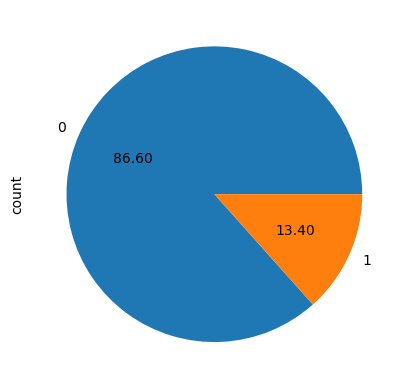

In [10]:
y_dependent.value_counts().plot.pie(autopct='%.2f')

In [11]:
#Convert the following features values into digit and to make some of the features classification object.

df.replace({'Gender': ['Male', 'Female']}, {'Gender': [1, 0]}, inplace=True)
df.replace({'VisitFrequency': ['Rarely', 'Daily', 'Weekly', 'Monthly']}, {'VisitFrequency': [0, 1, 2, 3]}, inplace=True)
df.replace({'PreferredCuisine': ['American', 'Chinese', 'Indian', 'Italian', 'Mexican']}, {'PreferredCuisine': [0, 1, 2, 3, 4]}, inplace=True)
df.replace({'TimeOfVisit': ['Breakfast', 'Lunch', 'Dinner']}, {'TimeOfVisit': [0, 1, 2]}, inplace=True)
df.replace({'DiningOccasion': ['Business', 'Casual', 'Celebration']}, {'DiningOccasion': [0, 1, 2]}, inplace=True)
df.replace({'MealType': ['Dine-in', 'Takeaway']}, {'MealType': [0, 1]}, inplace=True)

In [12]:
df

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,1,83380,2,27.829142,1,0,3,0,1,0,1,1,43.523929,2,5,4,0
1,655,19,1,43623,0,115.408622,0,2,1,1,0,0,0,0,57.524294,5,5,3,0
2,656,41,0,83737,2,106.693771,0,2,6,2,0,0,1,0,48.682623,3,4,5,0
3,657,43,1,96768,0,43.508508,2,1,1,2,0,0,0,0,7.552993,4,5,1,0
4,658,55,0,67937,3,148.084627,1,0,1,0,1,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2149,39,1,114857,3,163.015254,0,1,2,0,0,0,1,1,7.206275,1,2,1,0
1496,2150,37,0,133506,2,190.991911,3,1,4,1,1,0,0,0,37.863952,5,2,2,0
1497,2151,46,1,119159,3,150.088604,0,1,4,1,0,0,1,0,3.925785,3,3,3,1
1498,2152,24,1,27970,2,196.363626,3,2,6,1,0,1,1,0,24.228038,2,2,4,1


<Axes: xlabel='Gender', ylabel='count'>

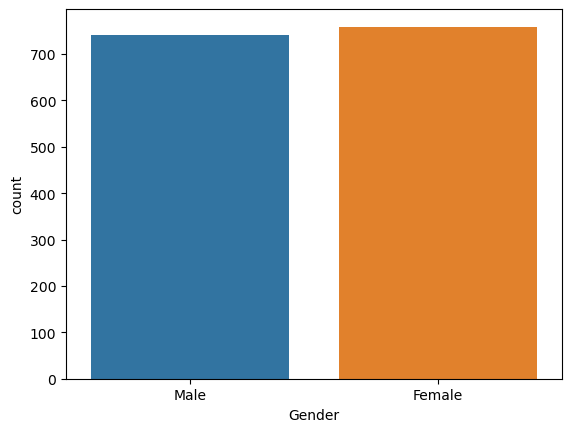

In [13]:
# Univariate distribution for Gender
# male & female

df_gender = df.replace({'Gender': {0: 'Female', 1: 'Male'}})
sns.countplot(x='Gender', data=df_gender)

<Axes: ylabel='count'>

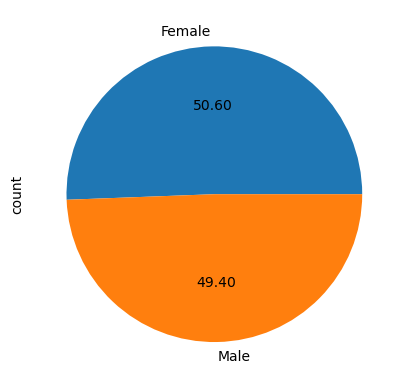

In [14]:
df_gender['Gender'].value_counts().plot.pie(autopct='%.2f')

<Axes: xlabel='CustomerID', ylabel='AverageSpend'>

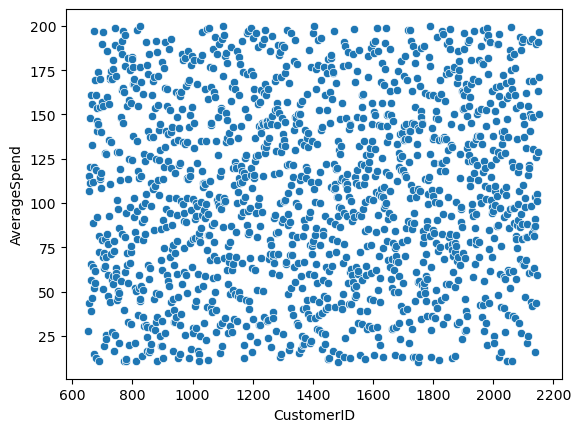

In [15]:
# Univariate distribution for Average Spend

sns.scatterplot(data=df, x=df["CustomerID"], y=df["AverageSpend"])

C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='MealType', ylabel='count'>

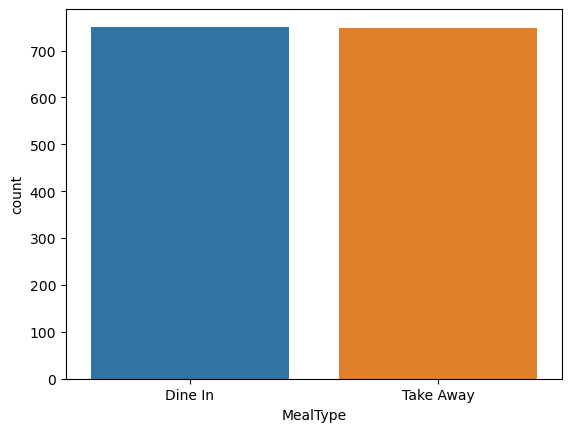

In [53]:
dfMealType = df.replace({'MealType': {0:'Dine In',
                                      1: 'Take Away'}})

# pd.option_context('mode.use_inf_as_na', True)
# sns.histplot(data=dfMealType, x="MealType")

sns.countplot(x='MealType', data=dfMealType)

In [17]:
# Convert the relevant variables to categorical variables as appropriate.
# The variables to convert are :
# Gender, VisitFrequency, PreferredCuisine, TimeOfVisit, GroupSize, DiningOccasion, 'MealType'
# OnlineReservation, LoyaltyProgramMember, ServiceRating, FoodRating and AmbianceRating

df['Gender'] = df.Gender.astype('category')
df['VisitFrequency'] = df.VisitFrequency.astype('category')
df['PreferredCuisine'] = df.PreferredCuisine.astype('category')
df['TimeOfVisit'] = df.TimeOfVisit.astype('category')
df['GroupSize'] = df.GroupSize.astype('category')
df['DiningOccasion'] = df.DiningOccasion.astype('category')
df['MealType'] = df.MealType.astype('category')
df['OnlineReservation'] = df.OnlineReservation.astype('category')
df['DeliveryOrder'] = df.DeliveryOrder.astype('category')
df['LoyaltyProgramMember'] = df.LoyaltyProgramMember.astype('category')
df['ServiceRating'] = df.ServiceRating.astype('category')
df['FoodRating'] = df.FoodRating.astype('category')
df['AmbianceRating'] = df.AmbianceRating.astype('category')

#change the type of income to float
df['Income'] = df.Income.astype('float64')

df.dtypes

CustomerID                 int64
Age                        int64
Gender                  category
Income                   float64
VisitFrequency          category
AverageSpend             float64
PreferredCuisine        category
TimeOfVisit             category
GroupSize               category
DiningOccasion          category
MealType                category
OnlineReservation       category
DeliveryOrder           category
LoyaltyProgramMember    category
WaitTime                 float64
ServiceRating           category
FoodRating              category
AmbianceRating          category
HighSatisfaction           int64
dtype: object

In [18]:
# computing the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize',
        'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember',
        'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0                    Age  7.927462
1                 Gender  1.963770
2                 Income  5.414018
3         VisitFrequency  3.474990
4           AverageSpend  4.817297
5       PreferredCuisine  3.012054
6            TimeOfVisit  2.417267
7              GroupSize  4.676324
8         DiningOccasion  2.442412
9               MealType  1.961971
10     OnlineReservation  1.419214
11         DeliveryOrder  1.662763
12  LoyaltyProgramMember  1.901890
13              WaitTime  3.860506
14         ServiceRating  5.105820
15            FoodRating  5.142439
16        AmbianceRating  4.817986


C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ServiceRating', ylabel='HighSatisfaction'>

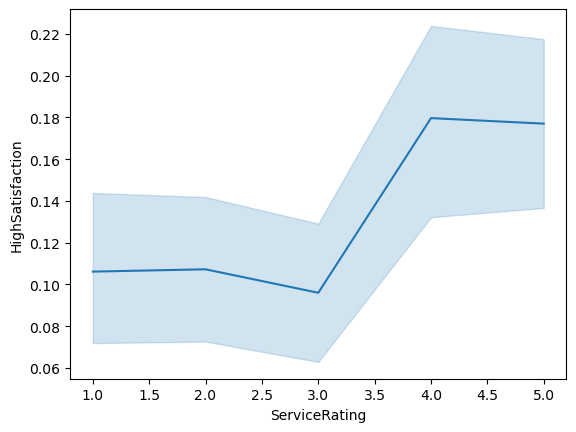

In [19]:
# Find the variables that are correlated and the variables that might help in finding the Satisfaction level.
sns.lineplot(data=df, x="ServiceRating", y="HighSatisfaction")

C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FoodRating', ylabel='HighSatisfaction'>

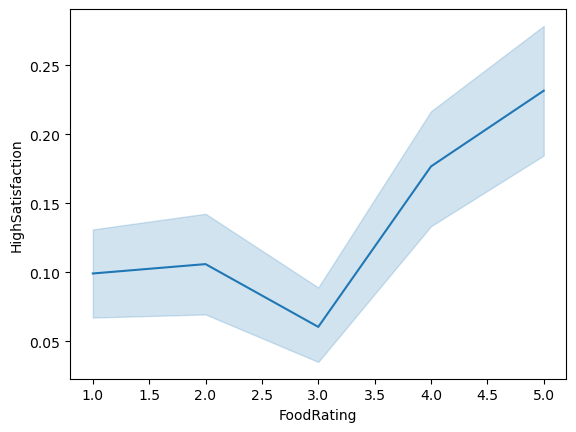

In [20]:
sns.lineplot(data=df, x="FoodRating", y="HighSatisfaction")

C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kinle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MealType', ylabel='HighSatisfaction'>

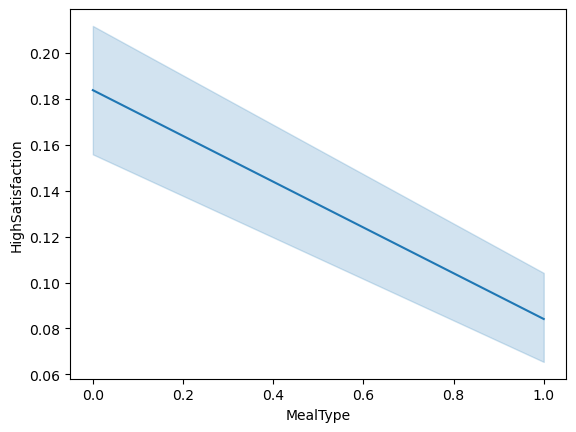

In [21]:
sns.lineplot(data=df, x="MealType", y="HighSatisfaction")

<Axes: >

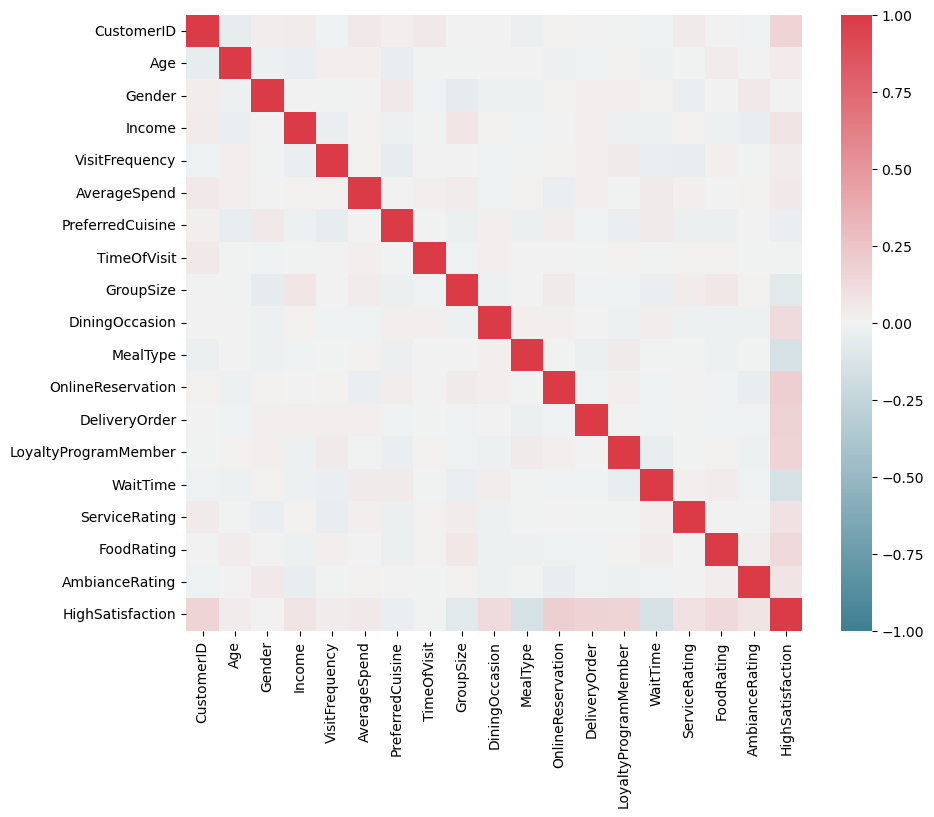

In [22]:
# The correlations among the variables
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax)

In [23]:
# print (df.iloc[:, -1])

X = df.iloc[:, 1:18].values
y = df.iloc[:, -1].values


In [24]:
# To balance the data set using SMOTE
from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
smote = SMOTE(sampling_strategy='all')
X, y = smote.fit_resample(X, y)

df_temp = pd.DataFrame(y)
df_temp.value_counts()

0    1299
1    1299
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=30)

In [26]:
# X_train = preprocessing.normalize(X_train)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2078, 17), (2078,), (520, 17), (520,))

In [28]:
dfTmp = pd.DataFrame(X_train)
dfTmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,39.036693,1.000000,114916.936932,2.000000,113.348233,0.590394,0.000000,7.114409,1.295197,1.000000,0.704803,0.295197,0.295197,40.094794,4.295197,4.000000,2.590394
1,41.000000,0.000000,58819.000000,0.000000,192.375254,2.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.921405,4.000000,4.000000,5.000000
2,52.436071,0.697996,32563.752209,2.000000,80.164019,2.697996,1.000000,3.302004,0.604008,0.697996,0.697996,0.697996,0.302004,44.240271,2.604008,4.000000,5.000000
3,59.543374,0.322831,118317.279292,2.322831,71.259034,2.708675,1.677169,2.645663,1.677169,0.000000,0.677169,1.000000,0.677169,7.258597,2.322831,1.645663,1.645663
4,35.000000,0.000000,55454.000000,2.000000,129.122241,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,58.403643,4.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,59.000000,1.000000,57770.000000,1.000000,12.191101,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,49.206865,1.000000,3.000000,4.000000
2074,32.000000,0.000000,48420.000000,3.000000,11.613487,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,1.000000,32.202965,4.000000,2.000000,4.000000
2075,33.000000,1.000000,132816.000000,3.000000,113.995677,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.114277,3.000000,2.000000,1.000000
2076,22.000000,1.000000,80939.000000,0.000000,160.013744,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.881951,5.000000,5.000000,4.000000


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=30, solver='sag' saga lbfgs)
clf = LogisticRegression(random_state=30,
                         C=10,
                         class_weight='balanced',
                         penalty='l2',
                         solver='lbfgs')

clf.fit(X_train, y_train)
yp = clf.predict(X_test)


In [31]:
# Finding the most important dependent variable by the coefficient value
coef_df = pd.DataFrame(clf.coef_)
coef_df['intercept'] = clf.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.151326 -0.061191  0.385536  0.078867  0.248817 -0.085972  0.030174   

          7         8         9        10       11        12        13  \
0 -0.432848  0.384025 -0.563473  0.761821  0.64866  0.535557 -0.512976   

         14        15        16  intercept  
0  0.370783  0.527502  0.407529  -0.083158  


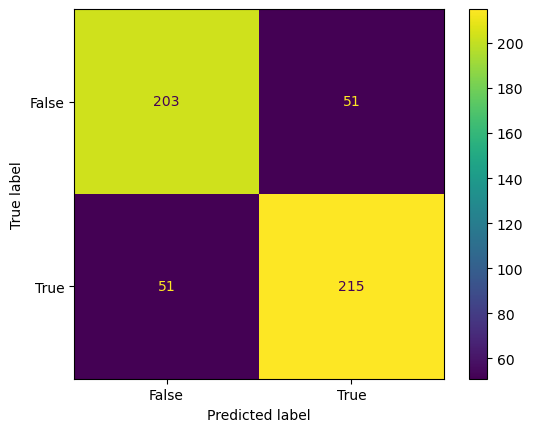

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, yp)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, yp))
print(classification_report(y_test, yp))

[[203  51]
 [ 51 215]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       254
           1       0.81      0.81      0.81       266

    accuracy                           0.80       520
   macro avg       0.80      0.80      0.80       520
weighted avg       0.80      0.80      0.80       520



In [34]:
# Fit a random forest
modelRF = RandomForestClassifier(n_estimators = 500,
                                 max_depth=5,
                                 random_state=30,
                                 max_features=5,
                                 class_weight='balanced')
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)
print(confusion_matrix)

[[243  11]
 [ 21 245]]


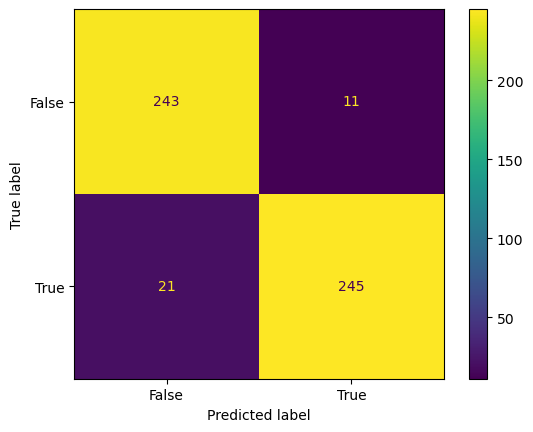

In [36]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [37]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       254
           1       0.96      0.92      0.94       266

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



In [38]:
# 4.1 Fit support vector machine (SVM) algorithms with the following parameters: gamma = 0.025 and C=3
#Create a svm Classifier
clfSVM = svm.SVC(gamma=0.05,
                 C=6,
                 class_weight='balanced')

#Train the model using the training sets
clfSVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clfSVM.predict(X_test)

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[237  17]
 [  5 261]]


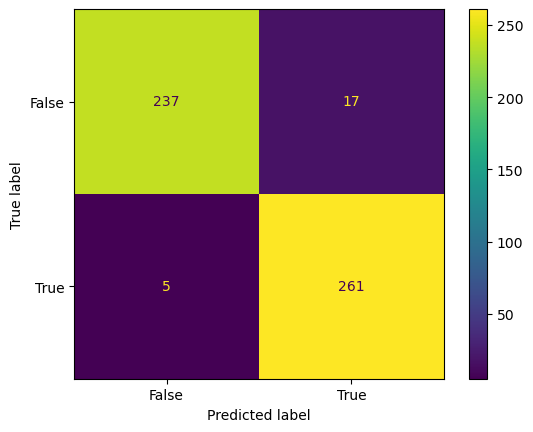

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       254
           1       0.94      0.98      0.96       266

    accuracy                           0.96       520
   macro avg       0.96      0.96      0.96       520
weighted avg       0.96      0.96      0.96       520



In [42]:
# Fit an ANN model (Sequential) with 16 input neurons and add two hidden layers with 8 neurons each.

X_train = preprocessing.normalize(X_train)


modelANN = Sequential()

#use "relu", normal kernel initialiser
modelANN.add(Dense(16, kernel_initializer='normal',
                   input_dim=17,
                   activation='relu'))
#second hidden layer
modelANN.add(Dense(8,
                   kernel_initializer='normal',
                   activation='relu'))
#third hidden layer
modelANN.add(Dense(8,
                   kernel_initializer='normal',
                   activation='relu'))

#output layer
modelANN.add(Dense(1, activation='sigmoid'))


In [43]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
sklearn_weights

array([0.99425837, 1.00580833])

In [44]:
# compile ANN using Adam optimizer, run for 100 epochs with a batch size of 15
modelANN.compile(optimizer='Adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

sklearn_weights = dict(enumerate(sklearn_weights))

#fit and display the summary
modelANN.fit(X_train,
             y_train, 
             epochs=300, 
             batch_size=50,
#             class_weight=sklearn_weights,
             verbose=1)

Epoch 1/300
42/42 [==============================] - 1s 964us/step - loss: 0.6925 - accuracy: 0.5385
Epoch 2/300
42/42 [==============================] - 0s 927us/step - loss: 0.6804 - accuracy: 0.6968
Epoch 3/300
42/42 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.7570
Epoch 4/300
42/42 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7993
Epoch 5/300
42/42 [==============================] - 0s 976us/step - loss: 0.5074 - accuracy: 0.7950
Epoch 6/300
42/42 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7897
Epoch 7/300
42/42 [==============================] - 0s 976us/step - loss: 0.4561 - accuracy: 0.7911
Epoch 8/300
42/42 [==============================] - 0s 976us/step - loss: 0.4469 - accuracy: 0.7921
Epoch 9/300
42/42 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7897
Epoch 10/300
42/42 [==============================] - 0s 990us/step - loss: 0.4373 - accuracy: 0.80

In [45]:
y_pred = modelANN.predict(X_test)
y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=2)

17/17 [==============================] - 0s 814us/step


In [46]:
score = modelANN.evaluate(X_test, y_test, verbose=0)
print(score)

[1.9594882726669312, 0.7846153974533081]


In [47]:
yy_pred = np.argmax(y_pred, axis=1)

In [48]:
results = modelANN.evaluate(X_test, y_test)
print(results)

17/17 [==============================] - 0s 944us/step - loss: 1.9595 - accuracy: 0.7846
[1.9594882726669312, 0.7846153974533081]


In [49]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
yy_test = np.argmax(y_test, axis=1)


In [50]:
confusion_matrix = metrics.confusion_matrix(yy_test, yy_pred)
print(confusion_matrix)

[[254   0]
 [229  37]]


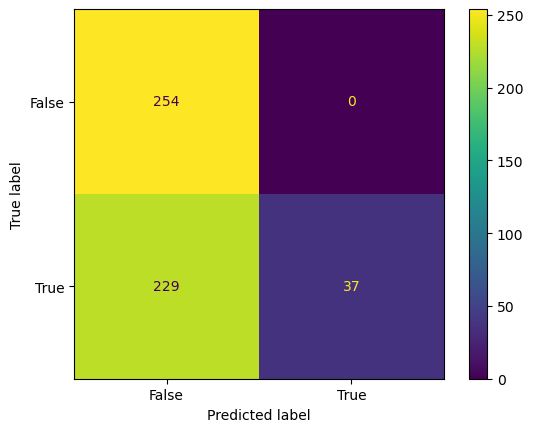

In [51]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [52]:
print(metrics.classification_report(yy_test, yy_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       254
           1       1.00      0.14      0.24       266

    accuracy                           0.56       520
   macro avg       0.76      0.57      0.47       520
weighted avg       0.77      0.56      0.46       520

